In [5]:
import numpy as np
import pandas as pd

In [15]:
df=pd.read_csv("Titanic.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,Brittany Ward,male,69,2,3,75eb0e8f-a090-460d-a7c7-655a7b434a72,19.87,Q,1
996,997,2,Edward Stanley,female,61,4,4,e55b93ad-8976-4471-9d7f-57d1e45def26,85.35,C,0
997,998,3,Christina Johnson,male,10,4,1,d06d3943-c8b3-415e-b664-704355c9bf0f,444.22,C,0
998,999,3,Edgar Miller,male,50,3,2,0e5779ec-be1a-470f-ad83-a4c869f8d3e4,234.67,S,1


In [19]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [21]:
df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

<Axes: title={'center': 'Survived'}, ylabel='count'>

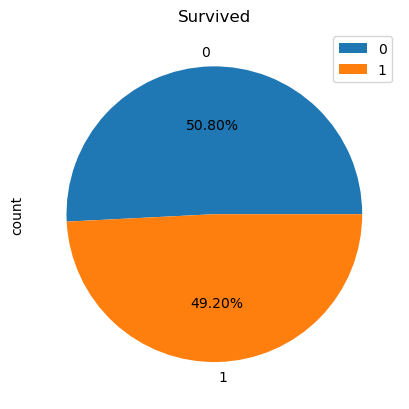

In [35]:
survived=df["Survived"].value_counts()
survived.plot.pie(title="Survived",legend=True,autopct='%0.2f%%')

<Axes: title={'center': 'Pclass'}, ylabel='count'>

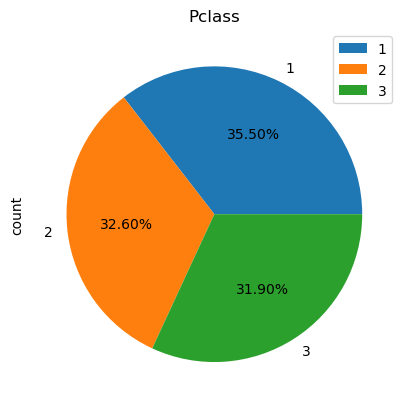

In [39]:
Pclass=df["Pclass"].value_counts()
Pclass.plot.pie(title="Pclass",legend=True,autopct='%0.2f%%')

<Axes: title={'center': 'Sex'}, ylabel='count'>

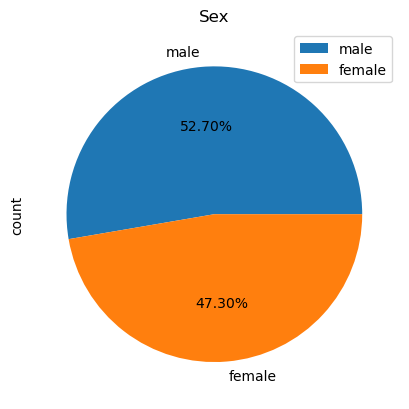

In [41]:
Sex=df["Sex"].value_counts()
Sex.plot.pie(title="Sex",legend=True,autopct='%0.2f%%')

In [43]:
df["Age"].describe()

count    1000.000000
mean       38.458000
std        23.103723
min         1.000000
25%        19.000000
50%        36.500000
75%        59.000000
max        79.000000
Name: Age, dtype: float64

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

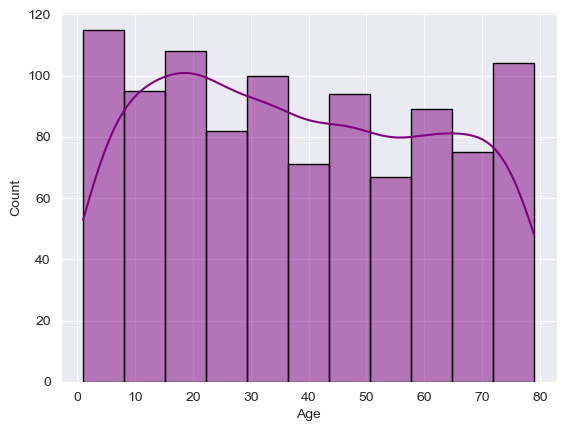

In [55]:
sns.set_style('darkgrid',{'grid.colour':'0.7','grid.linestyle':'-'})
sns.histplot(df['Age'],kde = True, color = 'purple', edgecolor = 'black')
plt.show()

<Axes: title={'center': 'Embarked'}, ylabel='count'>

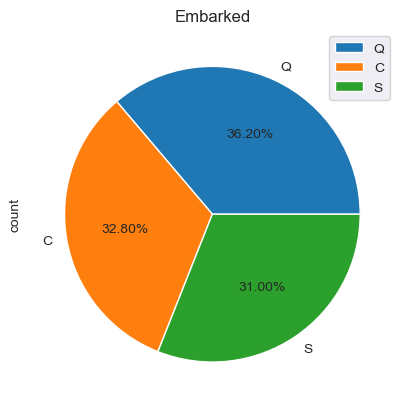

In [57]:
Embarked=df["Embarked"].value_counts()
Embarked.plot.pie(title="Embarked",legend=True,autopct='%0.2f%%')

In [63]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [69]:
df.drop(columns=['PassengerId','Ticket','Name'],axis='1',inplace=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,17,4,2,144.08,Q,1
1,1,male,60,2,2,249.04,S,0
2,3,male,64,0,0,50.31,Q,1
3,3,male,35,4,0,235.20,C,1
4,1,female,70,0,3,160.17,C,1


In [73]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
862,3,1,21,4,4,174.33,0,0
44,1,1,26,1,2,79.20,1,0
731,1,1,79,0,0,292.72,0,1
292,3,1,37,2,1,360.23,0,1
75,2,1,34,4,0,84.50,2,0


In [75]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [79]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 0.20512821, ..., 0.5       , 0.27372591,
        0.5       ],
       [0.        , 1.        , 0.75641026, ..., 0.5       , 0.48803496,
        1.        ],
       [1.        , 1.        , 0.80769231, ..., 0.        , 0.08226478,
        0.5       ],
       ...,
       [1.        , 1.        , 0.11538462, ..., 0.25      , 0.88655668,
        0.        ],
       [1.        , 1.        , 0.62820513, ..., 0.5       , 0.45869405,
        1.        ],
       [0.        , 1.        , 0.02564103, ..., 0.75      , 0.56482767,
        0.        ]])

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.23,random_state=46)

In [85]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [87]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

print(y_pred_lr[:5], y_pred_dt[:5], y_pred_rf[:5])

[1 0 0 0 1] [0 0 0 1 0] [1 0 0 1 1]


In [91]:
print(confusion_matrix(y_test, y_pred_lr))
print('-------------------------------------')
print(confusion_matrix(y_test, y_pred_dt))
print('-------------------------------------')
print(confusion_matrix(y_test, y_pred_rf))

[[78 36]
 [63 53]]
-------------------------------------
[[57 57]
 [62 54]]
-------------------------------------
[[56 58]
 [64 52]]


In [97]:
print(classification_report(y_test, y_pred_lr))



              precision    recall  f1-score   support

           0       0.55      0.68      0.61       114
           1       0.60      0.46      0.52       116

    accuracy                           0.57       230
   macro avg       0.57      0.57      0.56       230
weighted avg       0.57      0.57      0.56       230



In [100]:
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.48      0.50      0.49       114
           1       0.49      0.47      0.48       116

    accuracy                           0.48       230
   macro avg       0.48      0.48      0.48       230
weighted avg       0.48      0.48      0.48       230



In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48       114
           1       0.47      0.45      0.46       116

    accuracy                           0.47       230
   macro avg       0.47      0.47      0.47       230
weighted avg       0.47      0.47      0.47       230

